<a href="https://colab.research.google.com/github/alessandropessoa/ciencia-de-Dados/blob/main/tarefa01_aprendizadoMaqSaude_revisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from scipy import stats
import matplotlib.pyplot as plt
import plotly.subplots as sp
from typing import Optional

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from sklearn.preprocessing import OneHotEncoder

**Data understanding**

In [11]:
# Carregar o dataset
url = "/content/drive/MyDrive/Colab Notebooks/heart.csv"


In [12]:
data = pd.read_csv(url)

In [13]:
data.shape

(1025, 14)

In [14]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [20]:
idades = data.age.unique()
idades,idades.min()

(array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
        63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
        76, 40, 39, 77, 69, 35, 74]),
 29)

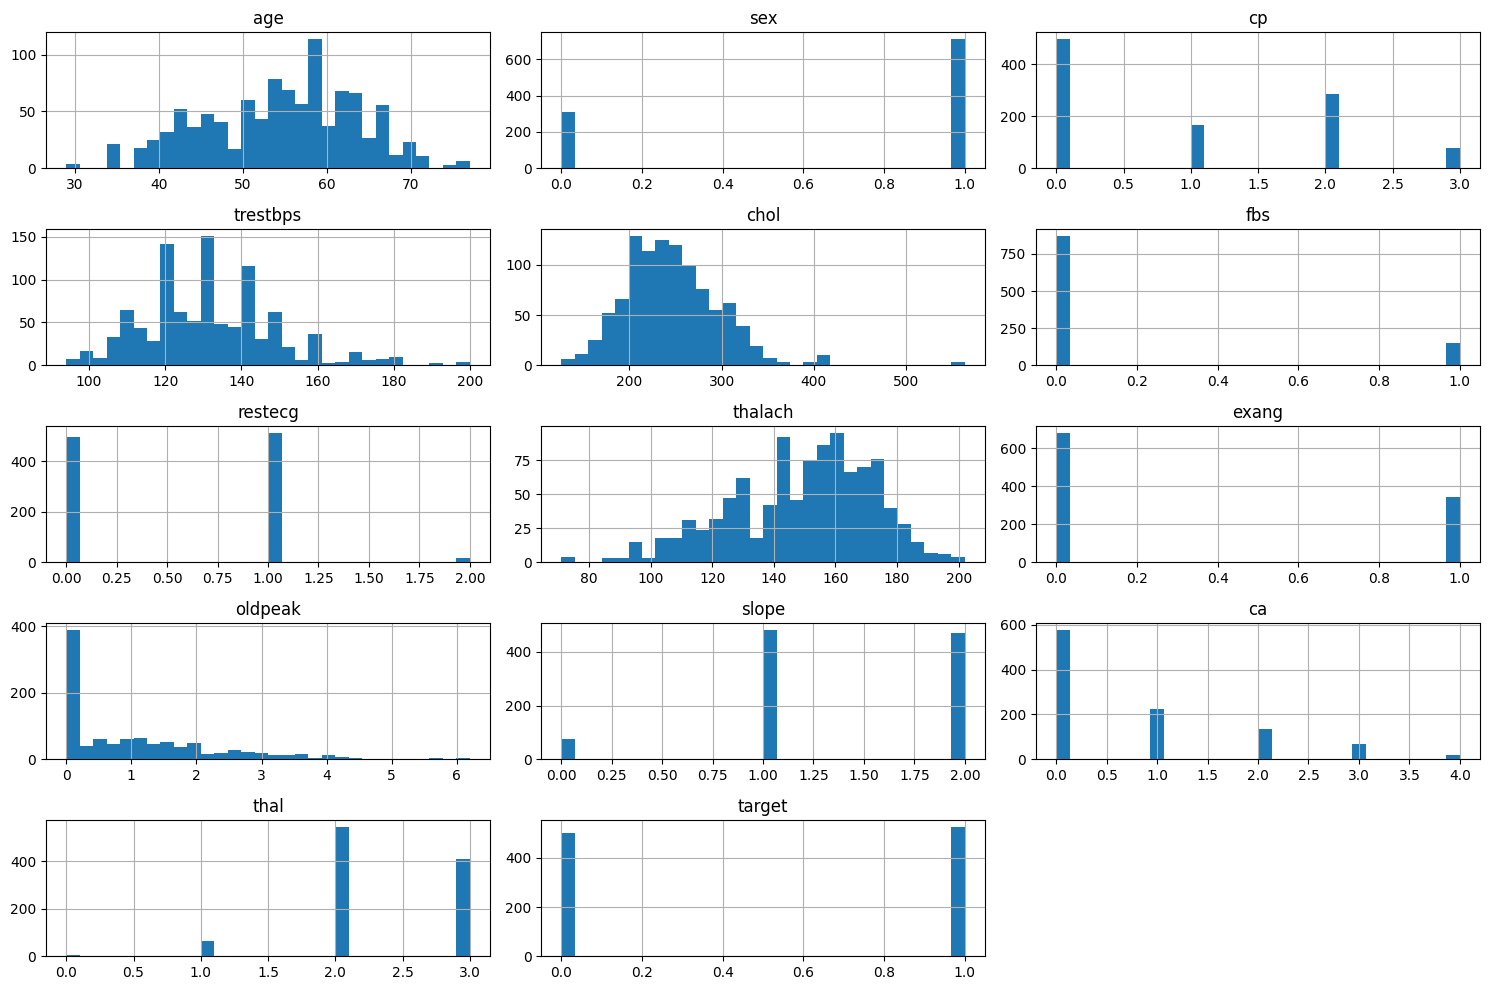

In [21]:
# @title DataViz Estatica
# Verifica e seleciona quais são as variáveis numéricas e plota os histogramas
df_numeric = data.select_dtypes(include=['float64', 'int64'])

# Ajustar o tamanho da figura para exibir vários gráficos
df_numeric.hist(bins=30, figsize=(15, 10), layout=(len(df_numeric.columns) // 3 + 1, 3))
plt.tight_layout()
plt.show()

In [22]:
data.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [23]:
#dicionário com número de bins para cada variável
qtd_instanciasDiferentes = data.nunique().to_dict()
qtd_instanciasDiferentes

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trestbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalach': 91,
 'exang': 2,
 'oldpeak': 40,
 'slope': 3,
 'ca': 5,
 'thal': 4,
 'target': 2}

In [24]:
def geraHistograma(df:Optional[pd.DataFrame],feature:str,qtdBarras:int):
    fig =px.histogram(df, x=feature, nbins=qtdBarras)
    return fig.show()

In [25]:
def geraHistogramaEstatico(df:Optional[pd.DataFrame]):
    # Iterar sobre as colunas de interesse
    for column in data.columns:
        # Verificar se a coluna é do tipo numérico
        if pd.api.types.is_numeric_dtype(data[column]):
            plt.figure(figsize=(8, 6))

            # Criar o histograma
            sns.histplot(data=data, x=column, hue='target', multiple='stack', bins=25, palette={0: 'blue', 1: 'red'}, alpha=0.6, edgecolor='black')

            # Adicionar título e rótulos
            plt.title(f'Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frequência')
            plt.legend(title='Diagnóstico de doença cardíaca', labels=['Negativo', 'Positivo'])

            # Mostrar o gráfico
            plt.show()

DataViz Dunâmico-Interativo

In [26]:

for feature,qtdValDif in qtd_instanciasDiferentes.items():
#     # print(f'{feature} : {qtdValDif}')
    geraHistograma(df=data,feature=feature, qtdBarras=qtdValDif+2)

DataViz Estatico

```
# Isto está formatado como código
```



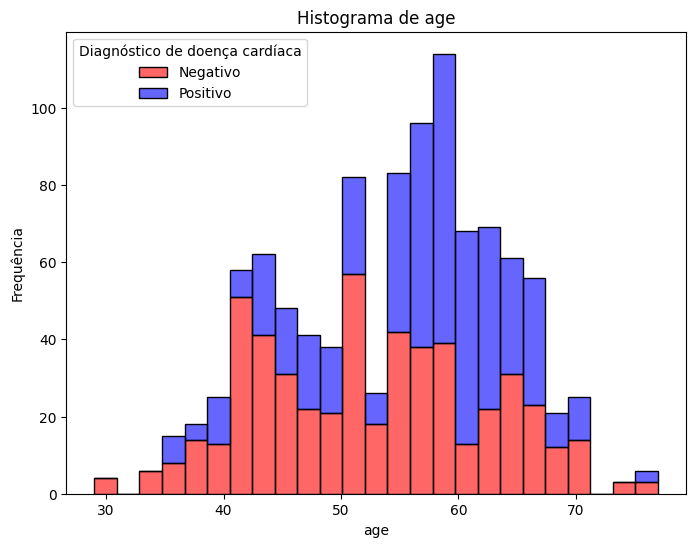

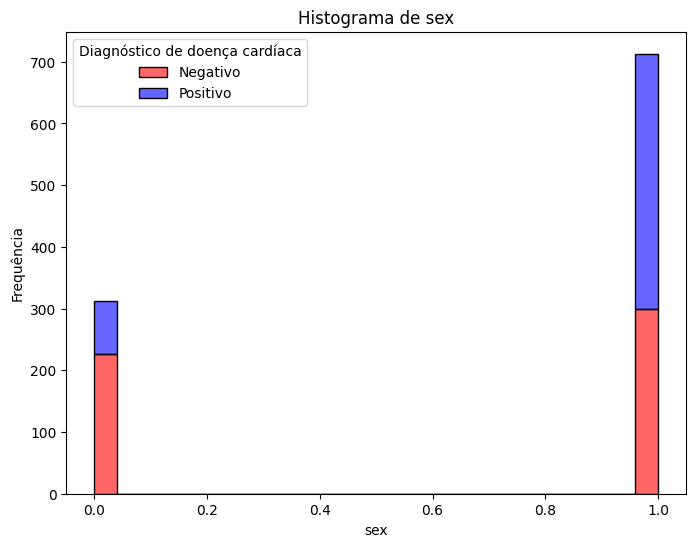

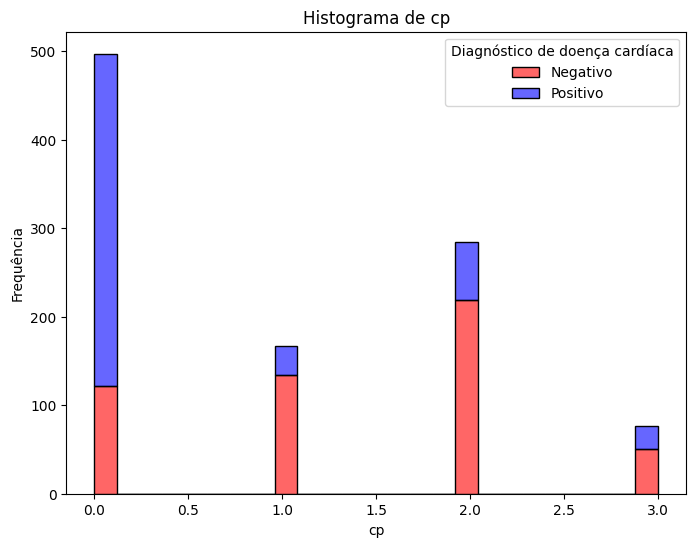

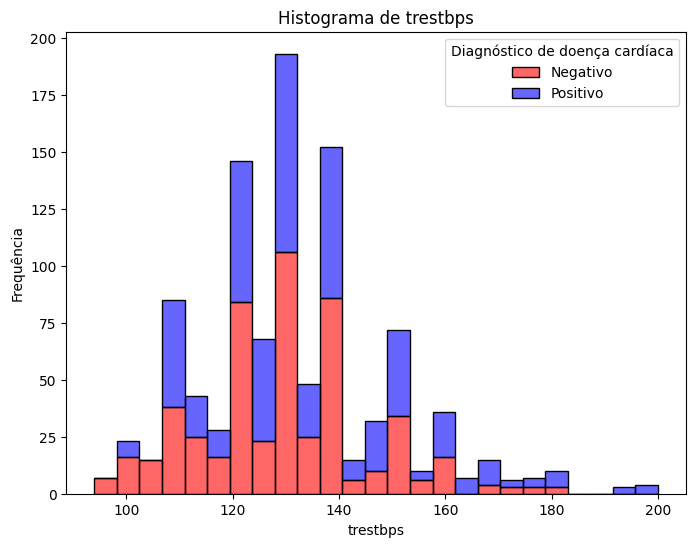

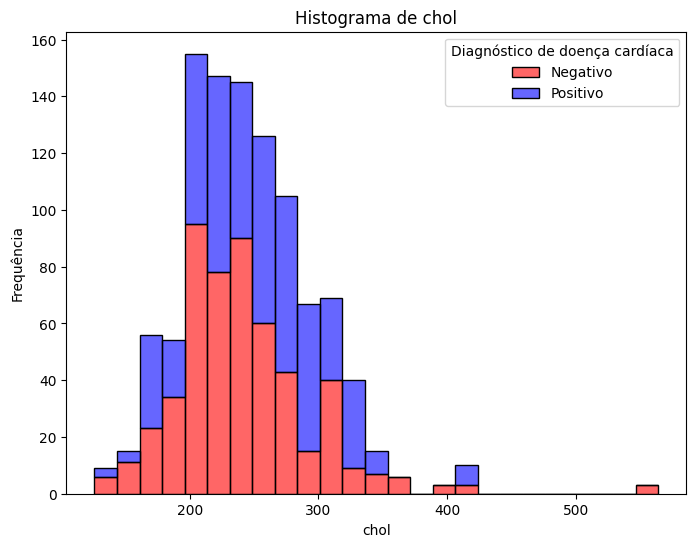

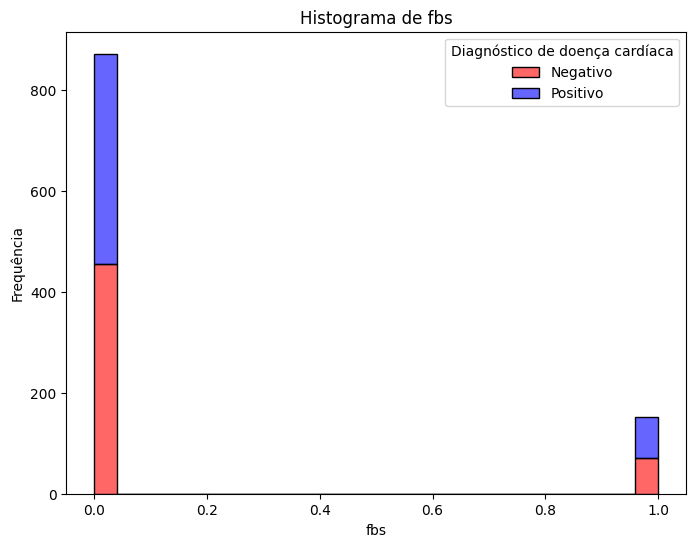

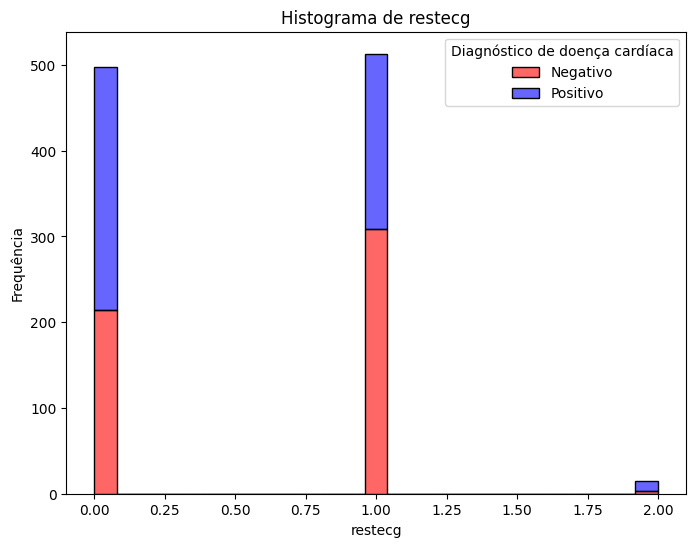

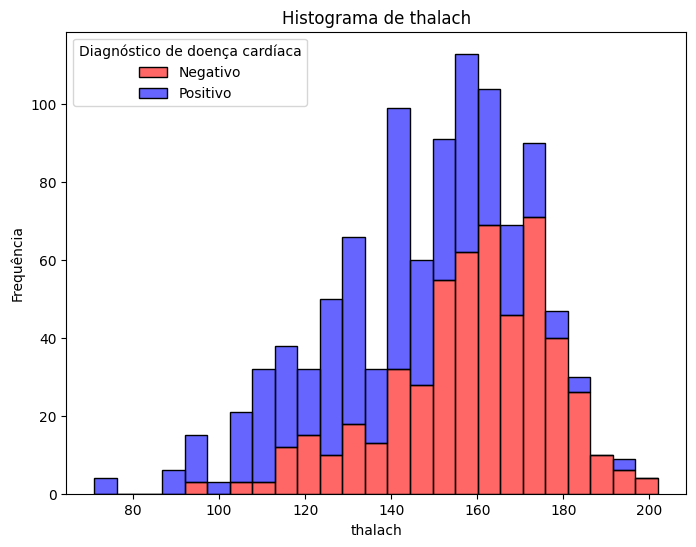

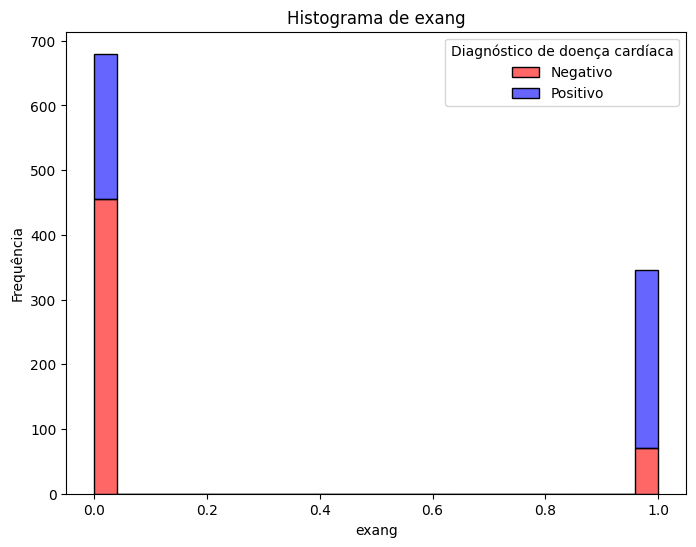

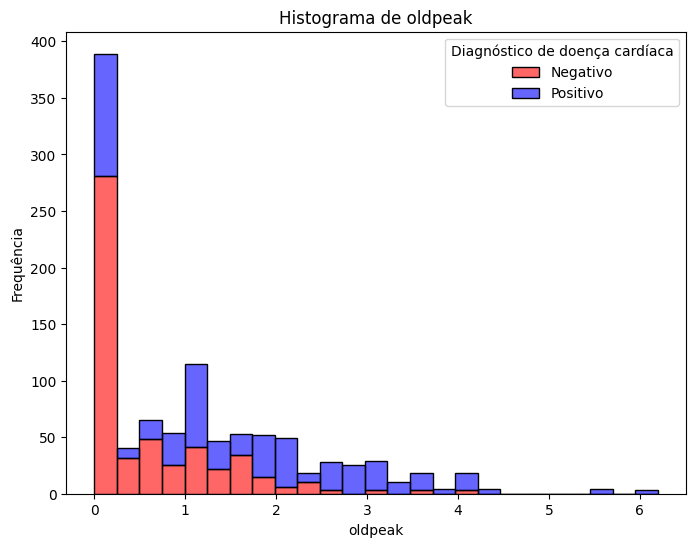

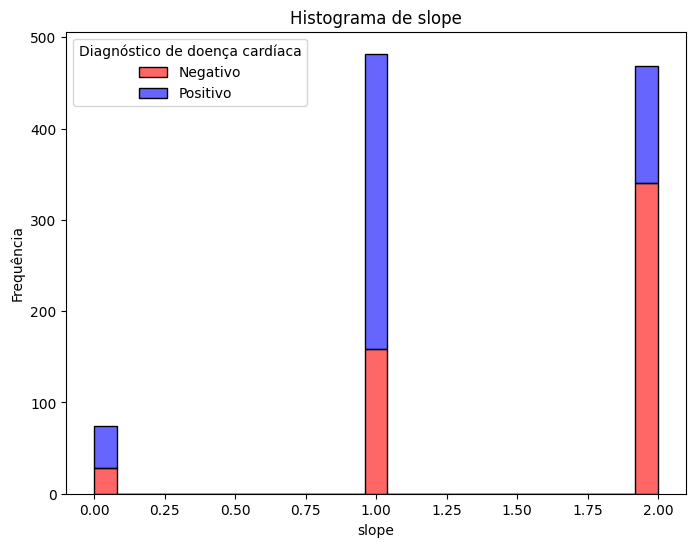

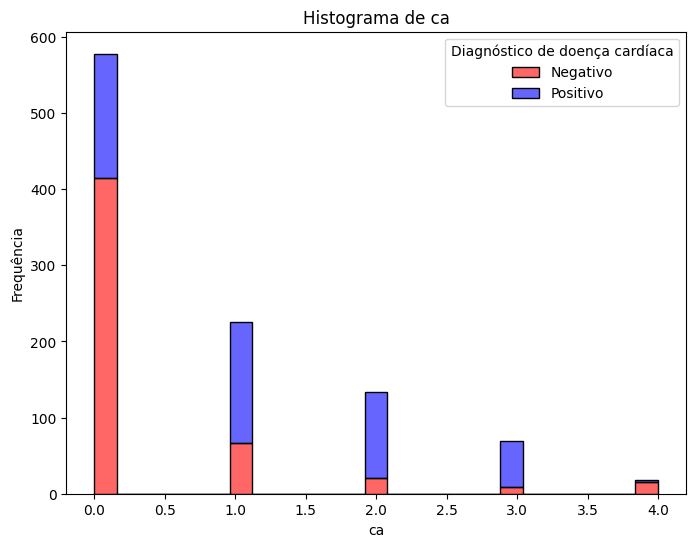

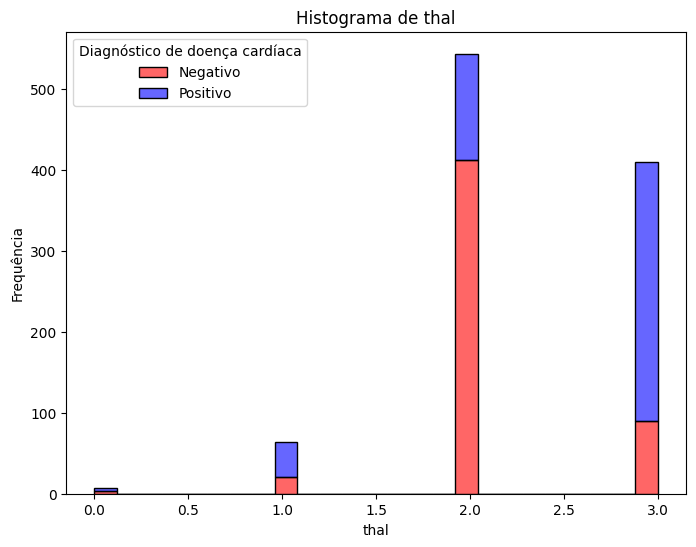

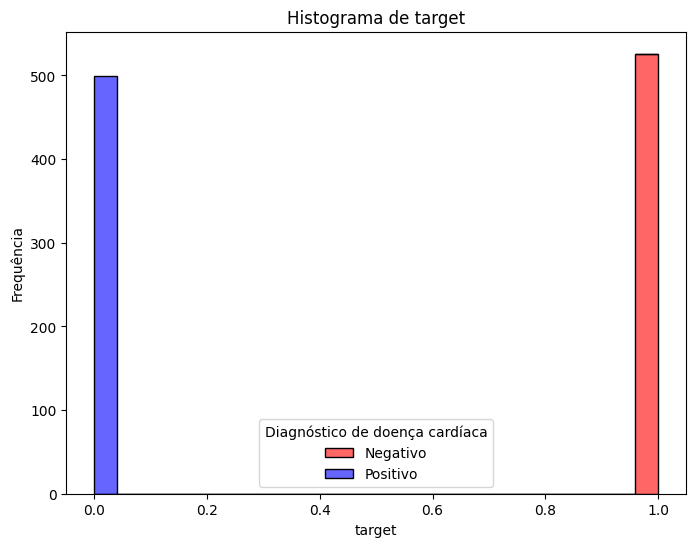

In [27]:
geraHistogramaEstatico(data)

In [28]:
#quantidade de pessoas por idade
data.groupby('age').size()

,0
age,
29,4
34,6
35,15
37,6
38,12
39,14
40,11
41,32
42,26


In [29]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [121]:
data.mean()

,0
age,54.434146
sex,0.695610
cp,0.942439
trestbps,131.611707
chol,246.000000
fbs,0.149268
restecg,0.529756
thalach,149.114146
exang,0.336585
oldpeak,1.071512


In [31]:
coeficienteVariacao = (data.std()/data.mean())*100
coeficienteVariacao.to_frame(name='Coeficiente_Variacao')

,Coeficiente_Variacao
age,16.666543
sex,66.182701
cp,109.252770
trestbps,13.309392
chol,20.972565
fbs,238.849580
restecg,99.645397
thalach,15.428264
exang,140.461358
oldpeak,109.663078


<Axes: >

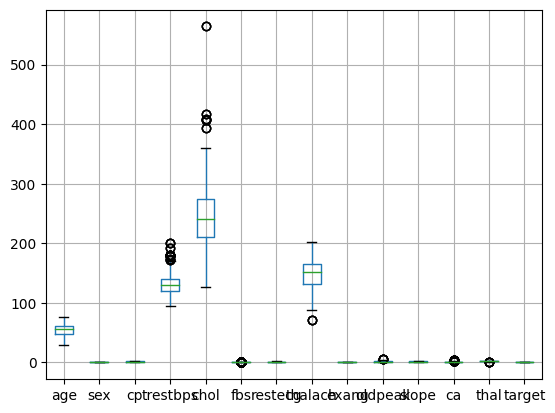

In [32]:
data.boxplot()

Préprocessamento

In [33]:
# Definir o mapeamento dos tipos
tipos_desejados = {
    'sex': 'object',
    'cp': 'object',
    'age': 'int64',
    'fbs':'object',
    'restecg':'object',
    'exang':'object',
    'slope':'object',
    'thal':'object',
    'target':'object'
}

In [34]:
dataPrep = data.astype(tipos_desejados)
dataPrep

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [35]:
dataPrep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


In [16]:
ohe = OneHotEncoder()

In [36]:
df_sex = pd.DataFrame(ohe.fit_transform(dataPrep[['sex']]).toarray())
df_sex.head(3)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0


In [38]:
df_sex.rename(columns={0:'feminino',1:'masculino'},inplace=True)
df_sex.head(3)

,feminino,masculino
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0


In [39]:
dataPrep_mod = dataPrep.join(df_sex)
dataPrep_mod.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,feminino,masculino
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.0,1.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.0,1.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.0,1.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.0,1.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1.0,0.0


In [40]:
dataPrep_mod.drop('sex',axis=1,inplace=True)
dataPrep_mod.head(3)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,feminino,masculino
0,52,0,125,212,0,1,168,0,1.0,2,2,3,0,0.0,1.0
1,53,0,140,203,1,0,155,1,3.1,0,0,3,0,0.0,1.0
2,70,0,145,174,0,1,125,1,2.6,0,0,3,0,0.0,1.0


In [42]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler= StandardScaler()
dataPadronizado = scaler.fit_transform(dataPrep_mod.drop(columns=['target']))

In [46]:
dataPadronizado

array([[-0.26843658, -0.91575542, -0.37763552, ...,  1.08985168,
        -0.66150409,  0.66150409],
       [-0.15815703, -0.91575542,  0.4791073 , ...,  1.08985168,
        -0.66150409,  0.66150409],
       [ 1.71659547, -0.91575542,  0.76468824, ...,  1.08985168,
        -0.66150409,  0.66150409],
       ...,
       [-0.81983438, -0.91575542, -1.23437834, ..., -0.52212231,
        -0.66150409,  0.66150409],
       [-0.4889957 , -0.91575542, -1.23437834, ..., -0.52212231,
         1.51170646, -1.51170646],
       [-0.04787747, -0.91575542, -0.66321646, ...,  1.08985168,
        -0.66150409,  0.66150409]])

In [49]:
dataPrep_mod.shape, dataPadronizado.shape, dataPrep_mod.keys()

((1025, 15),
 (1025, 14),
 Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
        'oldpeak', 'slope', 'ca', 'thal', 'target', 'feminino', 'masculino'],
       dtype='object'))

In [52]:
dataPadronizadoSemTarget = pd.DataFrame(dataPadronizado, columns=[key for key in dataPrep_mod.keys() if key != "target"])
dataPadronizadoSemTarget

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino
0,-0.268437,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-0.661504,0.661504
1,-0.158157,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-0.661504,0.661504
2,1.716595,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-0.661504,0.661504
3,0.724079,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-0.661504,0.661504
4,0.834359,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1.511706,-1.511706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,-0.661504,0.661504
1021,0.613800,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,-0.661504,0.661504
1022,-0.819834,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-0.661504,0.661504
1023,-0.488996,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1.511706,-1.511706


<Axes: >

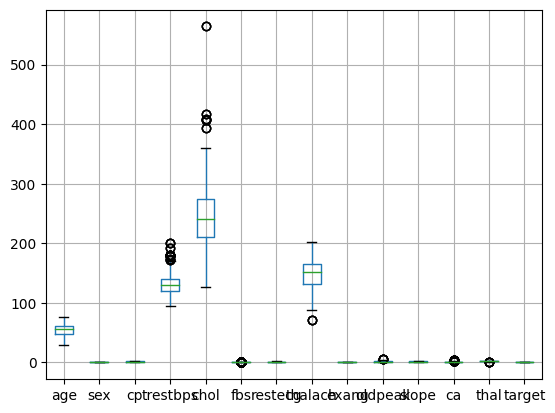

In [ ]:
data.boxplot()

<Axes: >

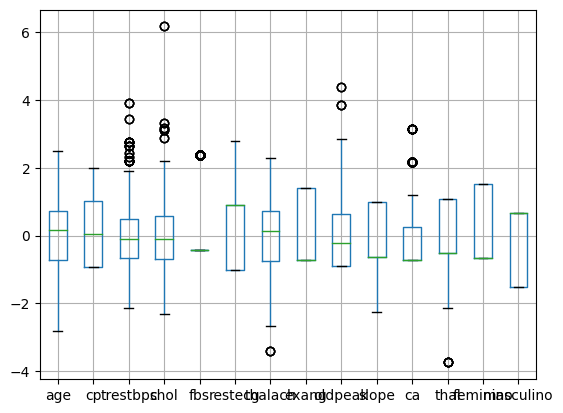

In [55]:
dataPadronizadoSemTarget.boxplot()

In [56]:
dataPadronizadoSemTarget.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'feminino', 'masculino'],
      dtype='object')

In [57]:
fig =px.box(dataPadronizadoSemTarget)
fig.show()

In [58]:
class CalculadorBoxplot():
    def __init__(self) -> None:
        self._df:Optional[pd.DataFrame] = None
        self._feature:str = ""
        self._limite_inferior:float = None
        self._limite_superior:float = None
        self._IQR:float =None
        self._Q1:float = None
        self._Q3:float = None

    def setDF(self,df:Optional[pd.DataFrame])->None:
        try:
            assert isinstance(df, pd.DataFrame), "O parâmetro 'dados' deve ser um pandas DataFrame"
            self._df = df
        except Exception as e:
            print("Erro", e)

    def setFeature(self,feature:str)->None:
      try:
            assert isinstance(feature, str), "O parâmetro 'feature' deve ser uma String"
            self._feature=feature
      except Exception as e:
            print("Erro", e)

    def calcular(self)->None:
        # Calcular Q1 (Primeiro Quartil), Q3 (Terceiro Quartil) e IQR
        self._Q1 = dataPadronizadoSemTarget[self._feature].quantile(0.25)
        self._Q3 = dataPadronizadoSemTarget[self._feature].quantile(0.75)
        self._IQR = self._Q3 - self._Q1

        # Limites do boxplot (whiskers)
        self._limite_inferior = self._Q1 - 1.5 * self._IQR
        self._limite_superior = self._Q3 + 1.5 * self._IQR

    def getParametrosBoxplot(self)->dict:
        params = {
            "limiteInferior":self._limite_inferior,
            "limiteSuperior":self._limite_superior,
            "iqr":self._IQR,
            "q1":self._Q1,
            "q3":self._Q3
        }
        return params

In [59]:
class FeaturesComOutliers():
    def __init__(self)->None:
        self.colecaoDFOutliers:list = []
        self.df:Optional[pd.DataFrame] = None
        self.ColecaoOutliers:dict = {}

    def extraiFeaturesComOutliers(self,CB:Optional[CalculadorBoxplot]):
        if not self.df.empty:
            for campo in self.df.columns:
                print(campo)
                calbp = CB()
                calbp.setDF(self.df)
                calbp.setFeature(campo)
                calbp.calcular()
                params = calbp.getParametrosBoxplot()
                print(params)
                aux = self.df[(self.df[campo]>params["limiteSuperior"]) | (self.df[campo]<params["limiteInferior"])]                # aux = self.df[self.df[campo]>2.3 ]

                if not aux.empty:
                    print("Há colunas (Features) com Outliers -> ",campo)
                    self.ColecaoOutliers[campo] = aux

In [60]:
a =FeaturesComOutliers()
a.df = dataPadronizadoSemTarget


In [61]:
a.extraiFeaturesComOutliers(CalculadorBoxplot)

age
{'limiteInferior': -2.86000621030568, 'limiteSuperior': 2.8745308350923344, 'iqr': 1.4336342613495034, 'q1': -0.7095548182814244, 'q3': 0.7240794430680791}
cp
{'limiteInferior': -3.8308153577261055, 'limiteSuperior': 3.9426778205352324, 'iqr': 1.9433732945653344, 'q1': -0.9157554158781038, 'q3': 1.0276178786872305}
trestbps
{'limiteInferior': -2.376702106106695, 'limiteSuperior': 2.192592949242384, 'iqr': 1.1423237638372699, 'q1': -0.6632164603507903, 'q3': 0.4791073034864796}
Há colunas (Features) com Outliers ->  trestbps
chol
{'limiteInferior': -2.5403677532102114, 'limiteSuperior': 2.424015031689133, 'iqr': 1.241095696224836, 'q1': -0.6787242088729573, 'q3': 0.5623714873518789}
Há colunas (Features) com Outliers ->  chol
fbs
{'limiteInferior': -0.41887792445571814, 'limiteSuperior': -0.41887792445571814, 'iqr': 0.0, 'q1': -0.41887792445571814, 'q3': -0.41887792445571814}
Há colunas (Features) com Outliers ->  fbs
restecg
{'limiteInferior': -3.8470036898519533, 'limiteSuperior':

In [62]:
a.ColecaoOutliers.keys()

dict_keys(['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal'])

In [63]:

[print(f"essa coluna contem instancias que são outlier ->  {x}") for x in a.ColecaoOutliers.keys()]

essa coluna contem instancias que são outlier ->  trestbps
essa coluna contem instancias que são outlier ->  chol
essa coluna contem instancias que são outlier ->  fbs
essa coluna contem instancias que são outlier ->  thalach
essa coluna contem instancias que são outlier ->  oldpeak
essa coluna contem instancias que são outlier ->  ca
essa coluna contem instancias que são outlier ->  thal


[None, None, None, None, None, None, None]

In [64]:
dataPadronizadoCOmTarget= dataPadronizadoSemTarget
dataPadronizadoCOmTarget['target'] = data['target']
dataPadronizadoCOmTarget

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino,target
0,-0.268437,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-0.661504,0.661504,0
1,-0.158157,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-0.661504,0.661504,0
2,1.716595,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-0.661504,0.661504,0
3,0.724079,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-0.661504,0.661504,0
4,0.834359,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1.511706,-1.511706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,-0.661504,0.661504,1
1021,0.613800,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,-0.661504,0.661504,0
1022,-0.819834,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-0.661504,0.661504,0
1023,-0.488996,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1.511706,-1.511706,1


6- Gráfico de Dispersão


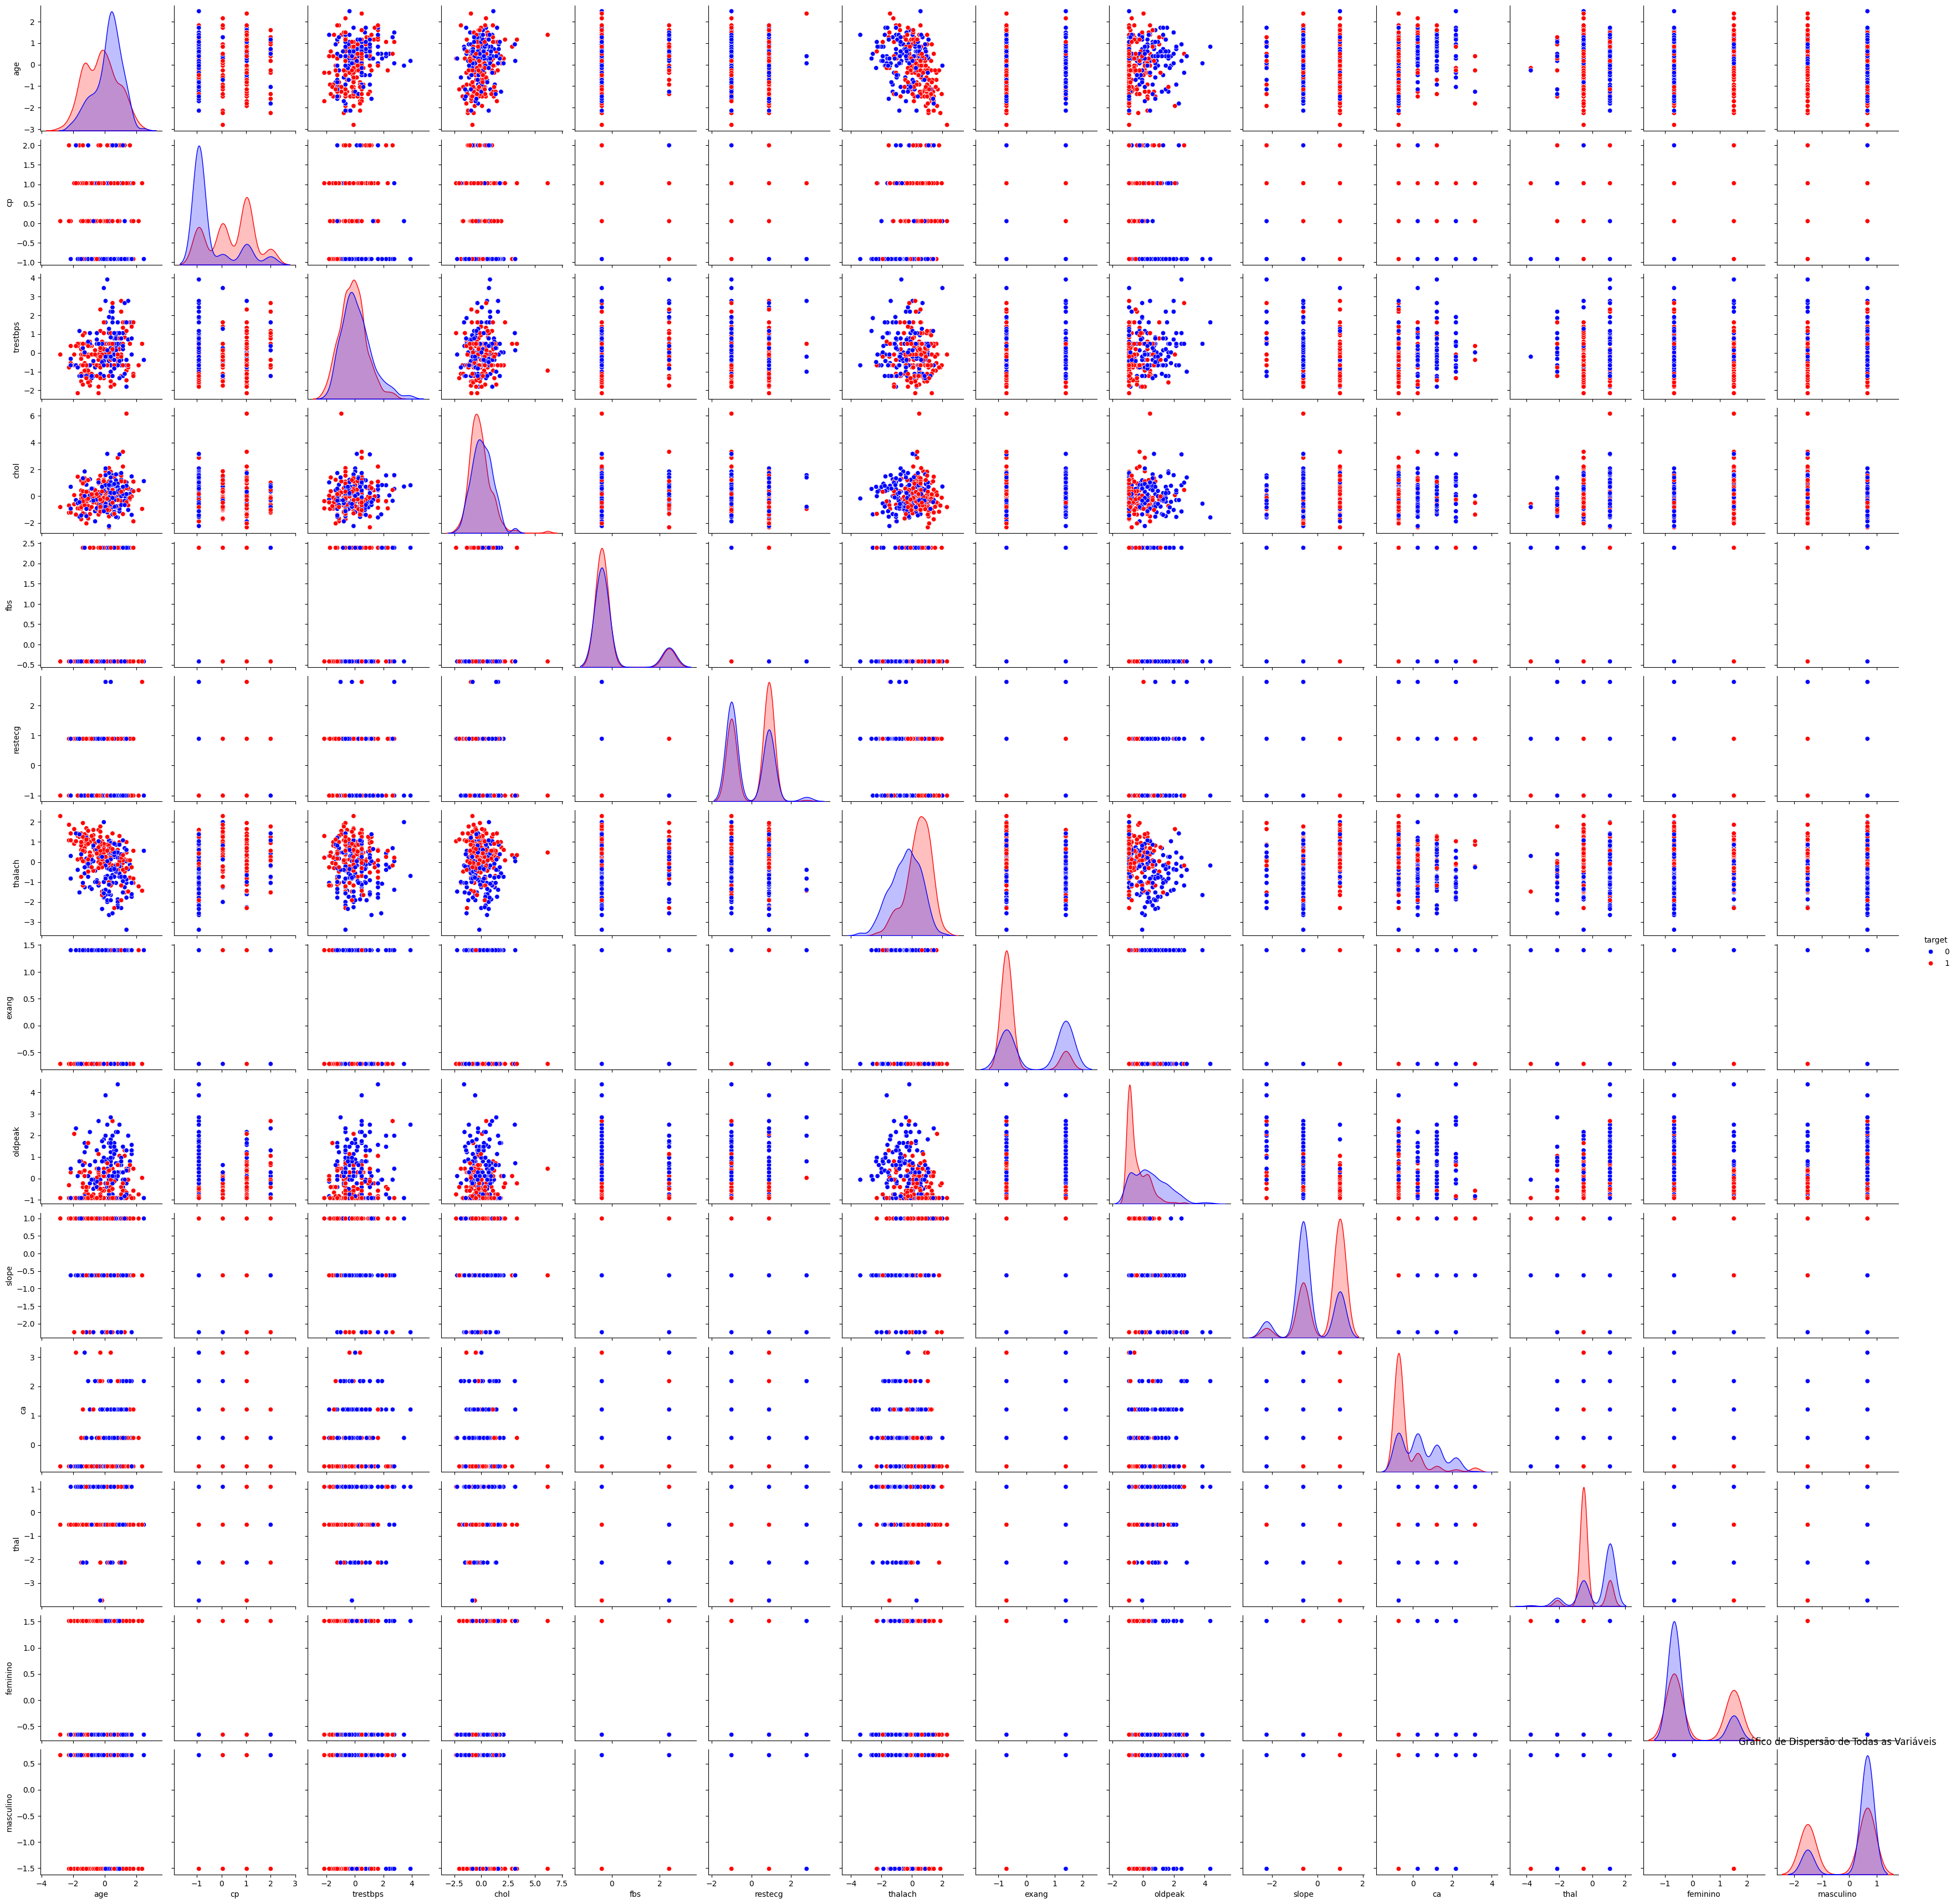

In [65]:
# Gráfico de dispersão de todas as variáveis
sns.pairplot(dataPadronizadoCOmTarget, hue='target', palette={0: 'blue', 1: 'red'})
plt.title('Gráfico de Dispersão de Todas as Variáveis')
plt.show()

In [67]:
#mostra quais instancias estão sendo consideradas outliers para a feature 'ca'
a.ColecaoOutliers['ca']

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino
4,0.834359,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1.511706,-1.511706
6,0.393241,-0.915755,-1.005914,1.396233,-0.418878,2.786558,-0.396362,-0.712287,2.834010,-2.243675,2.179817,-2.134096,-0.661504,0.661504
13,-0.378716,-0.915755,0.479107,1.008390,-0.418878,0.891255,-1.179158,1.403928,2.663722,-0.624121,2.179817,1.089852,-0.661504,0.661504
52,-1.812350,1.027618,0.364875,-1.376841,-0.418878,0.891255,1.038764,-0.712287,-0.912329,0.995433,3.150413,-0.522122,-0.661504,0.661504
53,-0.599275,1.027618,-0.663216,-1.124743,-0.418878,0.891255,-0.439851,-0.712287,0.790552,-0.624121,2.179817,1.089852,-0.661504,0.661504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.834359,1.027618,-0.092055,-0.290882,-0.418878,0.891255,-0.135430,-0.712287,0.620264,-0.624121,2.179817,1.089852,-0.661504,0.661504
993,-1.260953,-0.915755,0.022178,0.019392,2.387330,-1.004049,-0.265896,1.403928,-0.827185,-0.624121,3.150413,1.089852,-0.661504,0.661504
1003,-0.268437,-0.915755,-1.348611,-0.252098,2.387330,0.891255,-0.091941,-0.712287,-0.827185,0.995433,2.179817,1.089852,-0.661504,0.661504
1013,0.393241,-0.915755,-1.005914,1.396233,-0.418878,2.786558,-0.396362,-0.712287,2.834010,-2.243675,2.179817,-2.134096,-0.661504,0.661504


Criar Dataframe sem Outliers

In [68]:
#antes de excluir de fato realizando um teste
dataPadronizadoCOmTargetSemOutlier = dataPadronizadoCOmTarget
dataPadronizadoCOmTargetSemOutlier

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino,target
0,-0.268437,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-0.661504,0.661504,0
1,-0.158157,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-0.661504,0.661504,0
2,1.716595,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-0.661504,0.661504,0
3,0.724079,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-0.661504,0.661504,0
4,0.834359,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1.511706,-1.511706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,-0.661504,0.661504,1
1021,0.613800,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,-0.661504,0.661504,0
1022,-0.819834,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-0.661504,0.661504,0
1023,-0.488996,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1.511706,-1.511706,1


In [70]:
#execução pilote/teste de como será feito a remoção dos outliers
dataPadronizadoCOmTargetSemOutlier = dataPadronizadoCOmTarget.drop(a.ColecaoOutliers['thal'].index, axis=0)
dataPadronizadoCOmTargetSemOutlier

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino,target
0,-0.268437,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-0.661504,0.661504,0
1,-0.158157,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-0.661504,0.661504,0
2,1.716595,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-0.661504,0.661504,0
3,0.724079,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-0.661504,0.661504,0
4,0.834359,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1.511706,-1.511706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,-0.661504,0.661504,1
1021,0.613800,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,-0.661504,0.661504,0
1022,-0.819834,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-0.661504,0.661504,0
1023,-0.488996,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1.511706,-1.511706,1


In [71]:
for colunasOutliers in a.ColecaoOutliers.keys():
    # Filtrar os índices que existem no DataFrame
    indices_existentes = [index for index in a.ColecaoOutliers[colunasOutliers] if index in dataPadronizadoCOmTargetSemOutlier.index]

    # Remover apenas os índices que existem
    if indices_existentes:
        dataPadronizadoCOmTargetSemOutlier.drop(indices_existentes, axis=0, inplace=True)


In [72]:
 dataPadronizadoCOmTargetSemOutlier

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino,target
0,-0.268437,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-0.661504,0.661504,0
1,-0.158157,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-0.661504,0.661504,0
2,1.716595,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-0.661504,0.661504,0
3,0.724079,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-0.661504,0.661504,0
4,0.834359,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1.511706,-1.511706,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,-0.661504,0.661504,1
1021,0.613800,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,-0.661504,0.661504,0
1022,-0.819834,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-0.661504,0.661504,0
1023,-0.488996,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1.511706,-1.511706,1


In [73]:
from sklearn.model_selection import train_test_split, cross_val_predict, KFold,cross_val_score

Testar HoldOut 80-20

In [118]:
dataPadronizadoCOmTargetSemOutlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1018 non-null   float64
 1   cp         1018 non-null   float64
 2   trestbps   1018 non-null   float64
 3   chol       1018 non-null   float64
 4   fbs        1018 non-null   float64
 5   restecg    1018 non-null   float64
 6   thalach    1018 non-null   float64
 7   exang      1018 non-null   float64
 8   oldpeak    1018 non-null   float64
 9   slope      1018 non-null   float64
 10  ca         1018 non-null   float64
 11  thal       1018 non-null   float64
 12  feminino   1018 non-null   float64
 13  masculino  1018 non-null   float64
 14  target     1018 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 127.2 KB


In [74]:
variaveisIndependentes = dataPadronizadoCOmTargetSemOutlier.drop(columns=['target'])
variaveisIndependentes

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino
0,-0.268437,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,-0.661504,0.661504
1,-0.158157,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,-0.661504,0.661504
2,1.716595,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,-0.661504,0.661504
3,0.724079,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,-0.661504,0.661504
4,0.834359,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,1.511706,-1.511706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,-0.661504,0.661504
1021,0.613800,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,-0.661504,0.661504
1022,-0.819834,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,-0.661504,0.661504
1023,-0.488996,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1.511706,-1.511706


In [75]:
variavelDependente = dataPadronizadoCOmTargetSemOutlier['target']
variavelDependente

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [76]:
X_train, X_test, y_train, y_test = train_test_split(variaveisIndependentes,variavelDependente, test_size=0.2, random_state=42)

In [77]:
len(X_train), len(X_test), len(y_train), len(y_test)

(814, 204, 814, 204)

In [116]:
import statsmodels.api as sm

In [117]:
# Adicionando uma constante para o intercepto (usada pelo statsmodels)
X_train_const = sm.add_constant(X_train)

# Ajustando o modelo de Regressão Logística usando statsmodels
logit_model = sm.Logit(y_train, X_train_const).fit()

# Mostrando o resumo do modelo, que inclui o AIC
print(logit_model.summary())

# AIC pode ser acessado diretamente
aic_value = logit_model.aic
print(f"AIC do modelo: {aic_value}")

Optimization terminated successfully.
         Current function value: 0.352651
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  815
Model:                          Logit   Df Residuals:                      801
Method:                           MLE   Df Model:                           13
Date:                Fri, 13 Sep 2024   Pseudo R-squ.:                  0.4912
Time:                        23:31:47   Log-Likelihood:                -287.41
converged:                       True   LL-Null:                       -564.90
Covariance Type:            nonrobust   LLR p-value:                2.988e-110
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1756      0.113     -1.556      0.120      -0.397       0.046
age           -0.0666      0

O valor de AIC pode ser usado para comparação com outro modelo, o que tiver menor AIC é preferivel; Por exemplo:
Se o AIC de um modelo concorrente for 610, isso sugere que o modelo com AIC 602.821 é preferível.
Se houver um modelo com AIC de 590, então este seria preferível ao modelo com AIC de 602.821.

Interpretação do Pseudo 𝑅²  
Valores típicos:

Valores próximos a 0 indicam que o modelo não está explicando muito além do modelo nulo.
Valores mais próximos a 1 indicam um bom ajuste do modelo.
Interpretação:

Um valor de 0.4912 sugere que o modelo é relativamente bom em explicar a variabilidade na variável dependente em comparação com o modelo nulo (modelo sem variáveis explicativas).

Em geral, um valor de 0.2 a 0.4 é considerado um ajuste razoável para modelos de regressão logística, enquanto valores acima de 0.4 são bastante bons e indicam que o modelo está explicando uma proporção significativa da variabilidade.


In [78]:
# Criando o modelo de regressão logística
model = LogisticRegression()
# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

LogisticRegression()

In [79]:
# Verificando os parâmetros padrão do modelo
params = model.get_params()

print("Parâmetros do modelo:")
for key, value in params.items():
    print(f"{key}: {value}")

Parâmetros do modelo:
C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False


In [80]:
# Fazendo previsões com os dados de teste
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0])

In [81]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix

In [82]:
# Avaliando o modelo
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Metricas: acuracia: {acuracia:.2f} \n precisao: {precisao:.2f} \n recall: {recall:.2f} \n f1-score: {f1:.2f}")

Metricas: acuracia: 0.85 
 precisao: 0.85 
 recall: 0.85 
 f1-score: 0.85


In [83]:
# Obtendo os coeficientes
coeficientes = model.coef_
coeficientes

array([[-0.01959498,  0.82845467, -0.40474663, -0.28904493,  0.04856871,
         0.3385262 ,  0.6645029 , -0.4117702 , -0.73073491,  0.27913714,
        -0.72754513, -0.6685384 ,  0.4239321 , -0.4239321 ]])

In [84]:
coeficientes.T

array([[-0.01959498],
       [ 0.82845467],
       [-0.40474663],
       [-0.28904493],
       [ 0.04856871],
       [ 0.3385262 ],
       [ 0.6645029 ],
       [-0.4117702 ],
       [-0.73073491],
       [ 0.27913714],
       [-0.72754513],
       [-0.6685384 ],
       [ 0.4239321 ],
       [-0.4239321 ]])

In [85]:

# Obtendo o intercepto
intercept = model.intercept_

# Criando um DataFrame para visualizar os coeficientes
coef_df = pd.DataFrame(coeficientes.T, index=variaveisIndependentes.columns, columns=['Coeficiente'])
coef_df['Intercepto'] = intercept[0]

In [86]:
coef_df

,Coeficiente,Intercepto
age,-0.019595,-0.159525
cp,0.828455,-0.159525
trestbps,-0.404747,-0.159525
chol,-0.289045,-0.159525
fbs,0.048569,-0.159525
restecg,0.338526,-0.159525
thalach,0.664503,-0.159525
exang,-0.411770,-0.159525
oldpeak,-0.730735,-0.159525
slope,0.279137,-0.159525



Testar validação cruzada k-fold cross-validation



In [87]:
model = LogisticRegression()
# Configurando o k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [88]:
# Realizando a validação cruzada com previsões
y_pred = cross_val_predict(model, variaveisIndependentes,variavelDependente, cv=kf)

In [89]:
# Usando cross_val_score para avaliar o modelo
scores = cross_val_score(model,  variaveisIndependentes,variavelDependente, cv=kf, scoring='accuracy')
scores

array([0.85294118, 0.88235294, 0.84803922, 0.83251232, 0.85221675])

In [90]:
acuracia = accuracy_score(variavelDependente, y_pred)
precisao = precision_score(variavelDependente, y_pred)
recall = recall_score(variavelDependente, y_pred)
f1 = f1_score(variavelDependente, y_pred)
print(f"Metricas: acuracia: {acuracia:.2f} \n precisao: {precisao:.2f} \n recall: {recall:.2f} \n f1-score: {f1:.2f}")

Metricas: acuracia: 0.85 
 precisao: 0.83 
 recall: 0.90 
 f1-score: 0.86


Outra forma de realizar a validação cruzada para pegar os coeficientes da regressão

In [91]:
# Configurando o k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializando o modelo de regressão logística
model = LogisticRegression()

In [92]:
# Lista para armazenar coeficientes de cada fold
coeficientes_list = []

# Realizando a validação cruzada e obtendo coeficientes
for train_index, test_index in kf.split(variavelDependente):
    X_train, X_test = variaveisIndependentes.iloc[train_index], variaveisIndependentes.iloc[test_index]
    y_train, y_test = variavelDependente.iloc[train_index], variavelDependente.iloc[test_index]

    # Treinando o modelo
    model.fit(X_train, y_train)

    # Obtendo coeficientes e armazenando
    coeficientes = model.coef_
    coeficientes_list.append(coeficientes)

# Convertendo a lista de coeficientes em um DataFrame
coef_df = pd.DataFrame(np.vstack(coeficientes_list), columns=variaveisIndependentes.columns)

In [93]:
coef_df

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino
0,-0.019595,0.828455,-0.404747,-0.289045,0.048569,0.338526,0.664503,-0.411770,-0.730735,0.279137,-0.727545,-0.668538,0.423932,-0.423932
1,-0.051545,0.791964,-0.364679,-0.297722,-0.046797,0.269990,0.524563,-0.385777,-0.648845,0.258639,-0.791162,-0.606678,0.411042,-0.411042
2,-0.070760,0.877994,-0.299605,-0.298269,0.030585,0.145749,0.548452,-0.441900,-0.625945,0.264261,-0.817005,-0.637280,0.379027,-0.379027
3,-0.149835,0.810888,-0.293307,-0.264578,0.116162,0.243899,0.616877,-0.490852,-0.665841,0.463859,-0.846054,-0.666975,0.457718,-0.457718
4,-0.070447,0.884843,-0.254324,-0.327328,0.009604,0.234401,0.489054,-0.424418,-0.697303,0.285567,-0.778309,-0.622086,0.357551,-0.357551


In [94]:
model.coef_

array([[-0.07044692,  0.88484342, -0.25432411, -0.32732766,  0.00960439,
         0.23440144,  0.48905383, -0.424418  , -0.69730322,  0.28556726,
        -0.77830882, -0.62208639,  0.35755095, -0.35755095]])

In [95]:
# Odds Ratio
odds_ratios = np.exp(model.coef_[0])
print('Odds Ratios:')
for feature, ratio in zip(variaveisIndependentes.columns, odds_ratios):
    print(f'{feature}: {ratio:.4f}')

Odds Ratios:
age: 0.9320
cp: 2.4226
trestbps: 0.7754
chol: 0.7208
fbs: 1.0097
restecg: 1.2642
thalach: 1.6308
exang: 0.6542
oldpeak: 0.4979
slope: 1.3305
ca: 0.4592
thal: 0.5368
feminino: 1.4298
masculino: 0.6994


Autotuning

In [97]:
from sklearn.model_selection import GridSearchCV

In [96]:
# Definir a grade de hiperparâmetros para 'l1' (se aplicável)
param_grid_l1 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    'solver': ['saga']  # 'l1' só é suportado pelo solver 'saga'
}

# Definir a grade de hiperparâmetros para 'l2' (sem 'l1_ratio')
param_grid_l2 = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Definir a grade de hiperparâmetros para 'elasticnet' (com 'l1_ratio')
param_grid_elasticnet = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.9],
    'solver': ['saga']  # 'elasticnet' só é suportado pelo solver 'saga'
}


In [98]:
# Combinar todas as grades
param_grid = [param_grid_l1, param_grid_l2, param_grid_elasticnet]


In [99]:
# Configurando o GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # Número de folds para validação cruzada
    scoring='accuracy',  # Métrica de avaliação
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1  # Exibir informações durante a execução
)

# Ajustando o GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros encontrada
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Melhor modelo ajustado
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros encontrados:
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [100]:
# Fazendo previsões com o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliando a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo com melhores parâmetros: {acuracia:.2f}')

Acurácia do modelo com melhores parâmetros: 0.85


In [104]:

def plot_logistic_function(x_min=-10, x_max=10, k=1, x0=0, num_points=500):
    """
    Plota a função logística no intervalo [x_min, x_max].

    Parâmetros:
    - x_min: limite inferior do intervalo x
    - x_max: limite superior do intervalo x
    - k: coeficiente que controla a inclinação
    - x0: ponto de inflexão (deslocamento horizontal)
    - num_points: número de pontos para plotar
    """
    # Gera os valores de x
    x = np.linspace(x_min, x_max, num_points)

    # Calcula a função logística
    y = 1 / (1 + np.exp(-k * (x - x0)))

    # Cria o gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'k={k}, x0={x0}')
    plt.title('Gráfico da Função Logística')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.axvline(x=x0, color='gray', linestyle='--', label='x0')
    plt.axhline(y=0.5, color='red', linestyle='--', label='f(x)=0.5')
    plt.legend()
    plt.show()

In [105]:
x_min= dataPadronizadoSemTarget.min().to_numpy()
x_max= dataPadronizadoSemTarget.max().to_numpy()
dataPadronizadoSemTarget.min()

,0
age,-2.804866
cp,-0.915755
trestbps,-2.148237
chol,-2.327054
fbs,-0.418878
restecg,-1.004049
thalach,-3.397080
exang,-0.712287
oldpeak,-0.912329
slope,-2.243675


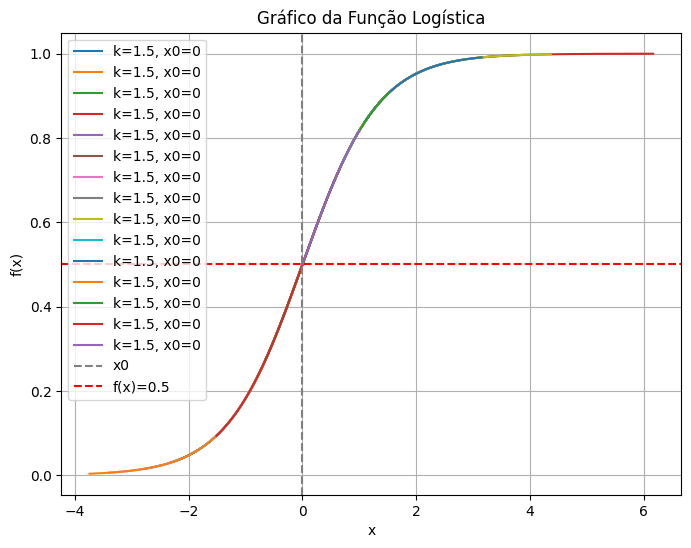

In [109]:
plot_logistic_function(x_min, x_max,k=1.5, x0=0)

#Teste de correlação para medir a força e a direção das associações de variáveis continua

In [114]:
matriz_correlacao = variaveisIndependentes.corr()
matriz_correlacao

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,feminino,masculino
age,1.000000,-0.072695,0.270896,0.219127,0.125020,-0.132652,-0.392010,0.089739,0.207939,-0.169703,0.270985,0.070079,0.103705,-0.103705
cp,-0.072695,1.000000,0.038187,-0.083220,0.090412,0.050097,0.314440,-0.397442,-0.172972,0.127094,-0.177516,-0.174645,0.034464,-0.034464
trestbps,0.270896,0.038187,1.000000,0.127212,0.185604,-0.124076,-0.040066,0.062197,0.187088,-0.120631,0.103722,0.056779,0.079704,-0.079704
chol,0.219127,-0.083220,0.127212,1.000000,0.034286,-0.146994,-0.023484,0.071103,0.063311,-0.014593,0.070920,0.086248,0.199939,-0.199939
fbs,0.125020,0.090412,0.185604,0.034286,1.000000,-0.115258,-0.013651,0.035855,0.010465,-0.055631,0.145048,-0.012411,-0.019504,0.019504
restecg,-0.132652,0.050097,-0.124076,-0.146994,-0.115258,1.000000,0.043289,-0.073141,-0.052807,0.091662,-0.078055,-0.019490,0.062310,-0.062310
thalach,-0.392010,0.314440,-0.040066,-0.023484,-0.013651,0.043289,1.000000,-0.388107,-0.355342,0.402621,-0.211336,-0.116161,0.057143,-0.057143
exang,0.089739,-0.397442,0.062197,0.071103,0.035855,-0.073141,-0.388107,1.000000,0.311099,-0.263637,0.111065,0.221954,-0.133562,0.133562
oldpeak,0.207939,-0.172972,0.187088,0.063311,0.010465,-0.052807,-0.355342,0.311099,1.000000,-0.574654,0.220350,0.201930,-0.081243,0.081243
slope,-0.169703,0.127094,-0.120631,-0.014593,-0.055631,0.091662,0.402621,-0.263637,-0.574654,1.000000,-0.073386,-0.097306,0.020783,-0.020783


<Axes: >

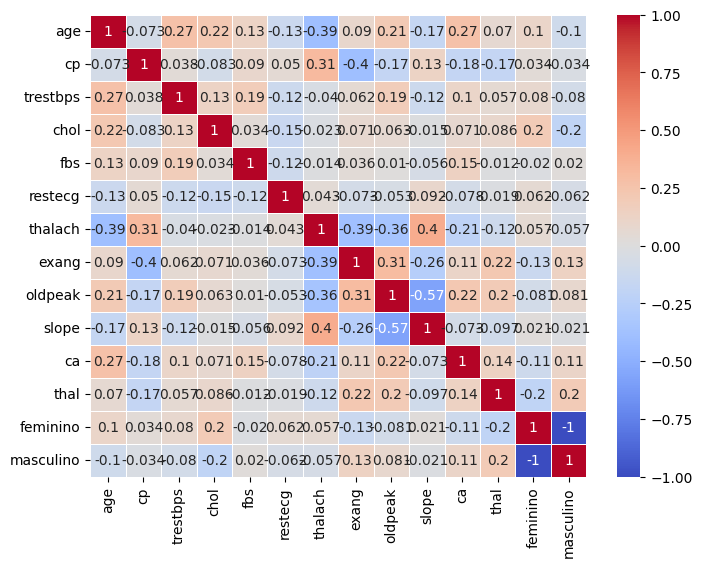

In [115]:
plt.figure(figsize=(8, 6))  # Tamanho da figura
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", linewidths=0.5)